In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import seaborn as sns

# Setting the float precision to 2 decimal places.

pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv
/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv


# Inputting the data 

We are going to use the penguins_size.csv because it is a simplified dataset, as written in the description on Kaggle.

In [2]:
df_size = pd.read_csv('/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')

# First glances on the dataset

Let's have an overview of the dataset.

In [3]:
df_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,MALE
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,FEMALE
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,FEMALE


One can notice that we have mainly information about penguins' culmen and flipper. It's also noticeable that we have a few NaN values, now we are going to have a deeper dive on the dataset.

# Which columns does have NaN values?

In [4]:
df_size.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
df_size.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.00,342.00,342.00,342.00
mean,43.92,17.15,200.92,4201.75
std,5.46,1.97,14.06,801.95
min,32.10,13.10,172.00,2700.00
25%,39.23,15.60,190.00,3550.00
50%,44.45,17.30,197.00,4050.00
75%,48.50,18.70,213.00,4750.00
max,59.60,21.50,231.00,6300.00


As we have only a few missing values we are going to drop those lines.

In [6]:
df_size.dropna(inplace=True)

# Checking if we truly have no missing values anymore

df_size.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# How many different species does the dataset have?

In [7]:
df_size['species'].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

In [8]:
df_size['species'].value_counts(normalize=True)

Adelie      0.44
Gentoo      0.36
Chinstrap   0.20
Name: species, dtype: float64

There are 3 different species on the dataset, which almost half is from the Adelie specie.

# Does the culmen length grows according to the body mass?

<AxesSubplot:xlabel='body_mass_g', ylabel='culmen_length_mm'>

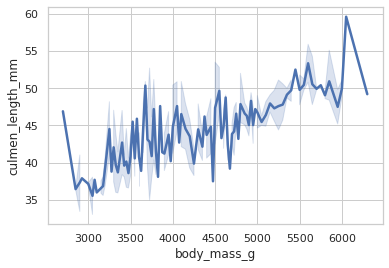

In [9]:
sns.set_theme(style="whitegrid")



sns.lineplot(x=df_size['body_mass_g'],y=df_size['culmen_length_mm'], \
             palette="tab10", linewidth=2.5)

We can see a slight relation between these two variables, but it's not linear.

# How's the body mass according to sex?

<AxesSubplot:xlabel='sex', ylabel='body_mass_g'>

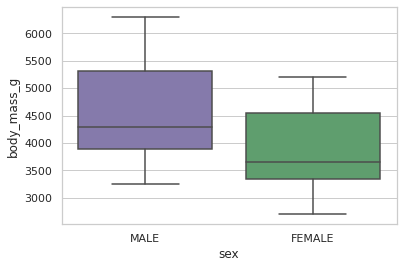

In [10]:

sex = ['MALE', 'FEMALE'] 
    
# selecting rows based on condition 
df_sex = df_size.loc[df_size['sex'].isin(sex)] 
    
sns.boxplot(x=df_sex["sex"], y=df_sex["body_mass_g"],
             palette=["m", "g"])

In [11]:
df_male = df_sex.loc[df_size['sex']=='MALE']

df_male['body_mass_g'].describe()

count    168.00
mean    4545.68
std      787.63
min     3250.00
25%     3900.00
50%     4300.00
75%     5312.50
max     6300.00
Name: body_mass_g, dtype: float64

In [12]:
df_female = df_sex.loc[df_size['sex']=='FEMALE']

df_female['body_mass_g'].describe()

count    165.00
mean    3862.27
std      666.17
min     2700.00
25%     3350.00
50%     3650.00
75%     4550.00
max     5200.00
Name: body_mass_g, dtype: float64

### One can understand that there is a considerable difference between female and male body mass.

About 25% of male penguins weighs more than the maximum of females penguins.

# Flipper length

In [13]:
df_flipper = df_size.copy()

### Let's understand the distribution of flipper length according to sex

<AxesSubplot:xlabel='sex', ylabel='flipper_length_mm'>

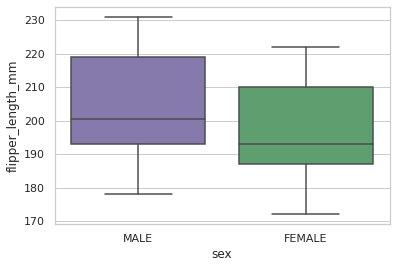

In [14]:
sex = ['MALE', 'FEMALE'] 
    
# selecting rows based on condition 
df_sex_flipper = df_size.loc[df_size['sex'].isin(sex)] 
    
sns.boxplot(x=df_sex_flipper["sex"], y=df_sex_flipper["flipper_length_mm"],
             palette=["m", "g"])

# Body mass per specie

In [15]:
df_species = df_size.copy()

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

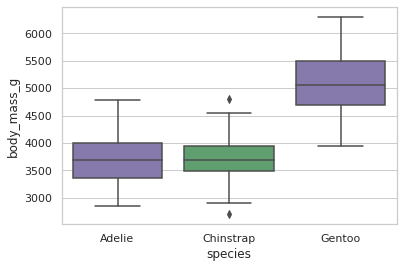

In [16]:
sex = ['MALE', 'FEMALE'] 
    
# selecting rows based on condition 
df_sex_flipper = df_size.loc[df_size['sex'].isin(sex)] 
    
sns.boxplot(x=df_sex_flipper["species"], y=df_sex_flipper["body_mass_g"],
             palette=["m", "g"])

# Correlation

How is the correlation between the variables?

In [17]:
df_size.corr().style.background_gradient(cmap="Blues")

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.00,-0.23,0.65,0.59
culmen_depth_mm,-0.23,1.00,-0.58,-0.47
flipper_length_mm,0.65,-0.58,1.00,0.87
body_mass_g,0.59,-0.47,0.87,1.00


One can observe that the correlation among the variables is not that big. It usually changes considerably through each other.